# 共享单车案例分析

In [4]:
# 导入数据分析包
import numpy as np
import pandas as pd

# 导入绘图工具包
import matplotlib.pyplot as plt
import seaborn as sns

# 导入日期时间变量处理相关的工具包
import calendar
from datetime import datetime

# 绘图设置
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# 读取数据
BikeData = pd.read_csv("bike.csv")
BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 作业9-1：

结合学习课件，画出count与holiday的箱线图以及count与month的箱线图，并将上面的两幅图和新产生的两幅图放到一个画布里。

In [ ]:
# 设置画布大小
fig = plt.figure(figsize = (18, 5))

# 添加第一个子图
# count与holiday的箱线图
ax1 = fig.add_subplot(121)
sns.boxplot(data=BikeData, y="count", x="holiday")
ax1.set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holidays")

# 添加第二个子图
# count与month的箱线图
ax2 = fig.add_subplot(122)
sns.boxplot(data=BikeData, y="count", x="month")
ax2.set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")

In [ ]:
# 设置画布大小
fig = plt.figure(figsize = (18, 10))

# 添加第一个子图
# 租车人数的箱线图
ax1 = fig.add_subplot(221)
sns.boxplot(data=BikeData, y="count")
ax1.set(ylabel='Count',title="Box Plot On Count")

# 添加第二个子图
# 租车人数和时间的箱线图
# 商业洞察：租车人数由时间是如何变化的?
ax2 = fig.add_subplot(222)
sns.boxplot(data=BikeData, y="count", x="hour")
ax2.set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hours")

# 添加第三个子图
# count与holiday的箱线图
ax3 = fig.add_subplot(223)
sns.boxplot(data=BikeData, y="count", x="holiday")
ax3.set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holidays")

# 添加第四个子图
# count与month的箱线图
ax4 = fig.add_subplot(224)
sns.boxplot(data=BikeData, y="count", x="month")
ax4.set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")

## 作业9-2：

在同一幅图中画出humidity和count的散点图以及windspeed和count的散点图，并分别加上简单线性回归直线

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Windspeed')]

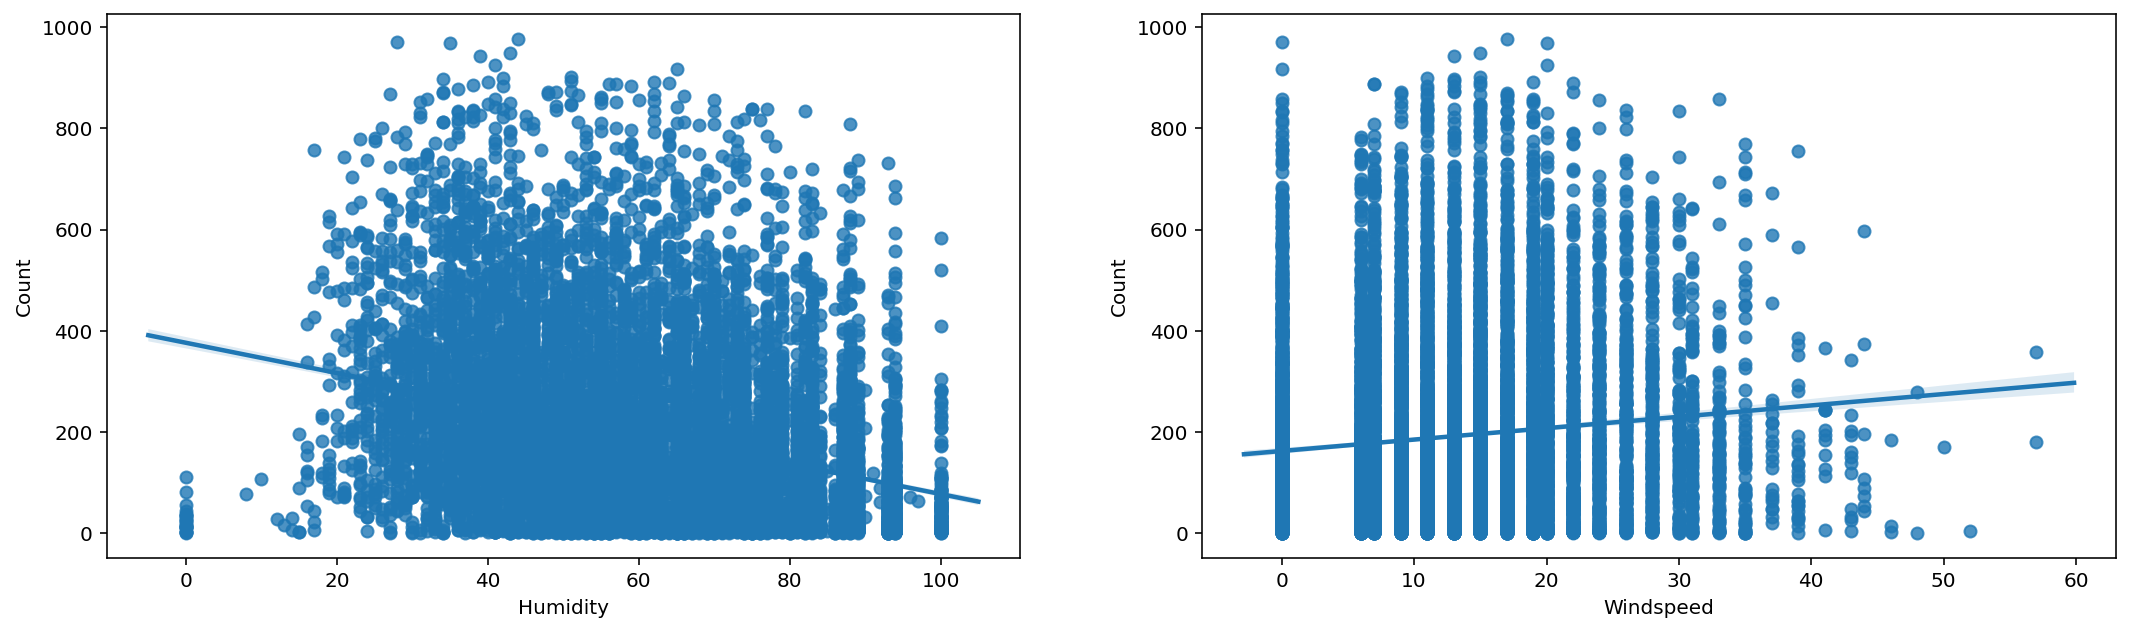

In [5]:
# 设置画布大小
fig = plt.figure(figsize = (18, 5))

ax1 = fig.add_subplot(121)
sns.regplot(x="humidity", y="count", data=BikeData)
ax1.set(xlabel='Humidity', ylabel='Count')

ax2 = fig.add_subplot(122)
sns.regplot(x="windspeed", y="count", data=BikeData)
ax2.set(xlabel='Windspeed', ylabel='Count')


## 作业9-3：
1. 使用map方法将weather改为有意义的标签
2. 画出按照星期数划分的每小时平均租车数量，并写出自己的洞察结果。

In [ ]:
BikeData["weather"]=BikeData.weather.map({1:"sunny",2:"cloudy",3:"rainy",4:"bad day"})
sns.FacetGrid(data=BikeData, size=8, aspect=1.5).\
map(sns.pointplot,'month','count','weather', palette='deep', ci=None).\
add_legend()

In [ ]:
BikeData["weather"]=BikeData.weather.map({1:"sunny",2:"cloudy",3:"rainy",4:"bad day"})
sns.FacetGrid(data=BikeData, size=8, aspect=1.5).\
map(sns.pointplot,'hour','count','weekday', palette='deep', ci=None).\
add_legend()

In [ ]:
# 周六和周天租车高峰期在下午期间，工作日租车的高峰期是上下班高峰期。